# Titanic Survival Prediction

## Introduction

On April 15, 1912, during her first voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. This project will consist of an analysis of the different circumstances and characteristics (referred to as _features_) of each passenger, and will try to predict the survival of passengers based on these features. 

This prediction model is created as part of a Kaggle challenge, which can be found [here](https://www.kaggle.com/c/titanic).


## Data

The raw data for this analysis consists of 3 csv files:
- train.csv 
- test.csv

The data in train.csv will be used to train the prediction model, and the test.csv will be used to test how well the model is able to predict the survival of passengers by submitting the results to Kaggle. The train.csv file contains the following columns:

| **Column** | **Description** | **Key** |
| ---| --- | --- |
| PassengerId | The unique identifier of each passenger | |
| Survived | Whether or not the passenger survived | 0 = not survived, 1 = survived|
| Pclass | The class in which the passenger was staying on the Titanic | 1 = 1st class, 2 = 2nd class, 3 = 3rd class|
| Name | Name and title of the passenger | |
| Sex | Gender of the passenger | male, female| 
| Age | Age in years | |
| SibSp | Number of siblings / spouses aboard the Titanic | | 
| Parch | Number of parents / children aboard the Titanic | |
| Ticket | Ticket number of the passenger | |
| Fare | Price of the passenger's ticket | |
| Cabin | Cabin number of the passenger | |
| Embarked | Port from which the passenger embarked the Titanic | C = Cherbourg, Q = Queenstown, S = Southampton|


The test.csv file contains all above mentioned columns, except for the column "Survived".

For the data exploration, data preparation and model creation, only the train.csv file will be used. 

## Package imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [3]:
titanic_df = pd.read_csv("../raw_data/train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.shape
print(f'There are {titanic_df.shape[0]} rows/passengers and {titanic_df.shape[1]} columns in the dataframe')

There are 891 rows/passengers and 12 columns in the dataframe


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Dropping columns

The column PassengerId is a unique identifier of the passenger in our dataframe. This is however not a meaningful column for our survival prediction, which it doesn't tell us anything significant about the passenger. We will therefore drop the columb from our dataframe.  

In [83]:
titanic_df.drop("PassengerId", axis="columns", inplace=True)

In [85]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


### Missing values

In [86]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

Not all columns are filled with values. The following columns have missing values:
- Age: 177 missing values
- Cabin: 687 missing values
- Embarked: 2 missing values

Let's see for each of the columns why the values could be missing

#### Age

In [87]:
titanic_df[titanic_df["Age"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


There is no clear reason why the ages are missing for these passengers. We will see in the data preparation what the best solution for the missing values will be. 

#### Cabin

In [88]:
titanic_df[titanic_df["Cabin"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [89]:
titanic_df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [90]:
titanic_df[titanic_df["Cabin"].isnull()]["Pclass"].value_counts()

3    479
2    168
1     40
Name: Pclass, dtype: int64

In [91]:
titanic_df[titanic_df["Cabin"].notnull()]["Pclass"].value_counts()

1    176
2     16
3     12
Name: Pclass, dtype: int64

It is also very difficult to see why some passengers have a registration of the cabin, and why some have not. As [this article from BBC](https://www.bbc.co.uk/bitesize/topics/z8mpfg8/articles/zkg9dxs) states, there were cabins for all 3 classes on the Titanic. Since there are so many missing values, we might drop the whole column in the data preparation step.

#### Embarked

In [92]:
titanic_df[titanic_df["Embarked"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


There are only 2 passengers of which the Embarked column fields are missing. A quick google search shows that:
- [Miss. Amelie Icard embarked on Southampton](https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html)
- [Mrs. George Nelson (Martha Evelyn) Stone also embarked on Southamption](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html)

### Distibution of numerical data

In [93]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There are 6 numerical columns in the data to be explored for the prediction model:
- Pclass
- Age
- SibSp
- Parch
- Fare

Let's first look at the individual distribution of these features, and then see if there is a correlation between each of these features. 

#### Individual distribution plots

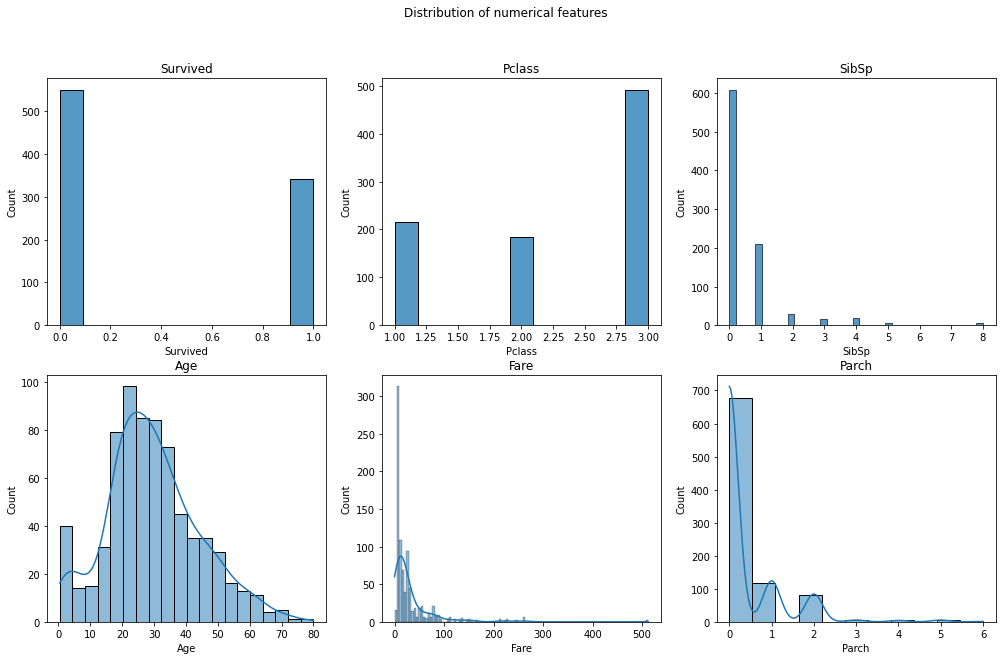

In [95]:
fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(17,10))
sns.histplot(titanic_df['Survived'], ax=axs[0,0])
sns.histplot(titanic_df['Pclass'], ax=axs[0,1])
sns.histplot(titanic_df['SibSp'], ax=axs[0,2])
sns.histplot(titanic_df['Age'], ax=axs[1,0], kde=True)
sns.histplot(titanic_df['Fare'], ax=axs[1,1], kde=True)
sns.histplot(titanic_df['Parch'], ax=axs[1,2], kde=True)

axs[0,0].set_title("Survived")
axs[0,1].set_title("Pclass")
axs[0,2].set_title("SibSp")
axs[1,0].set_title("Age")
axs[1,1].set_title("Fare")
axs[1,2].set_title("Parch")

fig.suptitle("Distribution of numerical features")
plt.show()

### Correlation between features

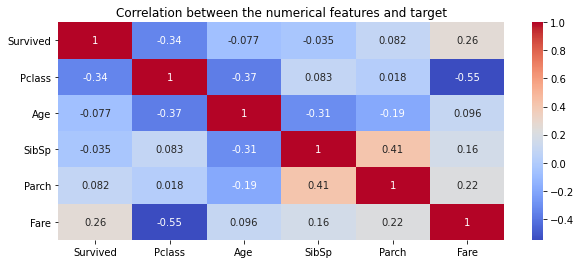

In [100]:
fig = plt.figure(figsize=(10,4))
sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm').set_title("Correlation between the numerical features and target");

## Data Preparation

From the Data Exploration, it became clear that the data is not completely clean yet. The data needs to be cleaned before we can investigate the features further.

### Filling missing values

#### Embarked

As we saw in the data exploration, the 2 missing values from the Embarked column were both "S" from Southhampton. Therefore, I will fill these missing values with "S". 

In [20]:
titanic_df[titanic_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [22]:
titanic_df["Embarked"].fillna("S", inplace=True)

In [26]:
titanic_df.loc[[61,829]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [27]:
titanic_df["Embarked"].isnull().sum()

0